In [121]:
%env SM_FRAMEWORK=tf.keras
import segmentation_models as sm
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

env: SM_FRAMEWORK=tf.keras


In [122]:
import os
train_ed = []
train_ed_seg = []
train_es = []
train_es_seg = []
test_ed = []
test_ed_seg = []
test_es = []
test_es_seg = []

#Training data

for dirname, _, filenames in sorted(os.walk('data/Train/')):
    for filename in filenames: 
        if filename.endswith("ED.nii") and not filename.endswith("_seg.nii"):
          #  print (os.path.join(dirname, filename))
            train_ed.append(nib.load(os.path.join(dirname, filename)))
train_ed = np.array(train_ed)

for dirname, _, filenames in sorted(os.walk('data/Train/')):
    for filename in filenames:
        if filename.endswith("ED_seg.nii") and not filename.endswith("_ED.nii"):
            train_ed_seg.append(nib.load(os.path.join(dirname, filename)))
train_ed_seg = np.array(train_ed_seg)

for dirname, _, filenames in sorted(os.walk('data/Train/')):
    for filename in filenames:
        if filename.endswith("ES.nii") and not filename.endswith("_seg.nii"):
            train_es.append(nib.load(os.path.join(dirname, filename)))
train_es = np.array(train_es)

for dirname, _, filenames in sorted(os.walk('data/Train/')):
    for filename in filenames:
        if filename.endswith("ES_seg.nii") and not filename.endswith("ES.nii"):
            train_es_seg.append(nib.load(os.path.join(dirname, filename)))
train_es_seg = np.array(train_es_seg)

#Test data
for dirname, _, filenames in sorted(os.walk('data/Test/')):
    for filename in filenames: 
        if filename.endswith("ED.nii") and not filename.endswith("_seg.nii"):
            test_ed.append(nib.load(os.path.join(dirname, filename)))
test_ed = np.array(test_ed)

for dirname, _, filenames in sorted(os.walk('data/Test/')):
    for filename in filenames:
        if filename.endswith("ED_seg.nii") and not filename.endswith("_ED.nii"):
            test_ed_seg.append(nib.load(os.path.join(dirname, filename)))
test_ed_seg = np.array(test_ed_seg)

for dirname, _, filenames in sorted(os.walk('data/Test/')):
    for filename in filenames:
        if filename.endswith("ES.nii") and not filename.endswith("_seg.nii"):
            test_es.append(nib.load(os.path.join(dirname, filename)))
test_es = np.array(test_es)

for dirname, _, filenames in sorted(os.walk('data/Test/')):
    for filename in filenames:
        if filename.endswith("ES_seg.nii") and not filename.endswith("ES.nii"):
            test_es_seg.append(nib.load(os.path.join(dirname, filename)))
test_es_seg = np.array(test_es_seg)

In [123]:
meta_train = pd.read_csv('data/metaDataTrain.csv')
meta_test = pd.read_csv('data/metaDataTest.csv')

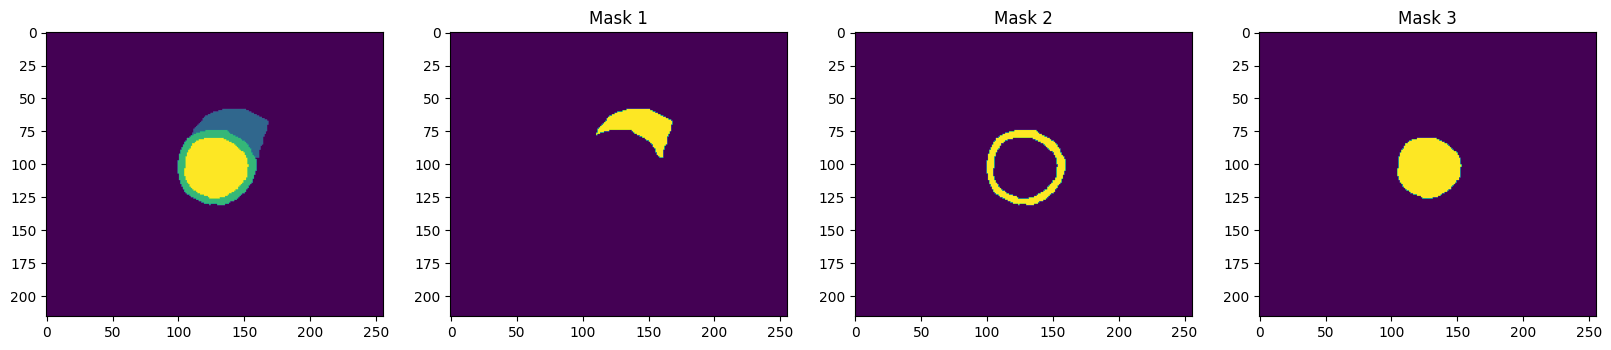

In [124]:
img = train_ed_seg[0].get_fdata()
np.unique(img)
#print images when values are 1,2 and 3
ax, fig = plt.subplots(1,4, figsize=(20,20))
fig[0].imshow(img[:,:,3])
for i in range(1,4):
    fig[i].imshow(img[:,:,3] == i)
    fig[i].set_title(f'Mask {i}')




In [125]:
n = train_ed_seg[0].get_fdata()[:,:,3].copy()

In [126]:
#replace all 3s with 0s
n[n == 3] = 0

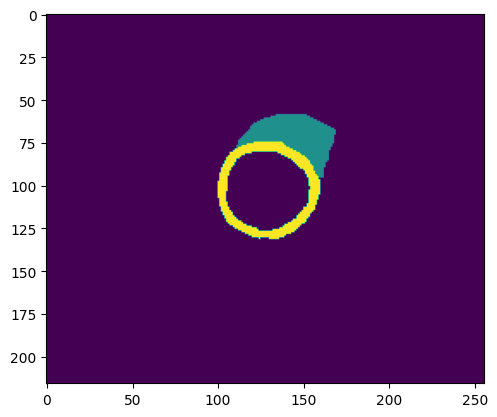

In [127]:
plt.imshow(n)

In [108]:
def replace_zeros_between_twos(image):
    image_copy = image.copy()
    for i, row in enumerate(image):
        start_idx = None
        for j, val in enumerate(row):
            if val == 2:
                if start_idx is not None:
                    for k in range(start_idx, j):
                        if row[k] == 0:
                            image_copy[i][k] = 3
                start_idx = j
    return image_copy


In [129]:
c = replace_zeros_between_twos(n)

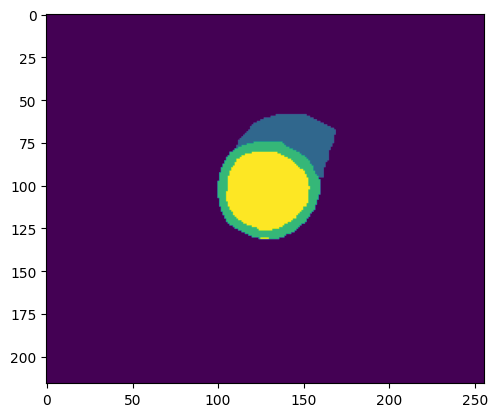

In [130]:
plt.imshow(c)

In [134]:
#calculate MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(c, train_ed_seg[0].get_fdata()[:,:,3] )
#count number of different pixels between train_ed_seg[0].get_fdata()[:,:,3]  and c
np.count_nonzero(c != train_ed_seg[0].get_fdata()[:,:,3] )
#calculate jaccard and dice score between train_ed_seg[0].get_fdata()[:,:,3]  and c
from sklearn.metrics import jaccard_score
jaccard_score(c.flatten(), train_ed_seg[0].get_fdata()[:,:,3].flatten(), average='micro')

0.9998191714435544

In [99]:
#in each line of the image n, if you detect values 0 between values 2, replace the zeros with values 3
for i in range(n.shape[0]):
    for j in range(n.shape[1]):
        if n[i,j] == 0:
            if 2 in n[i,:]:
                n[i,j] = 3
            elif 2 in n[:,j]:
                n[i,j] = 3

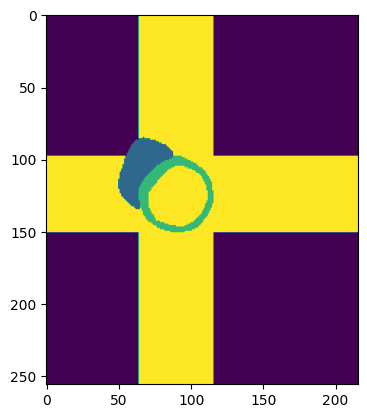

In [100]:
plt.imshow(n)

In [90]:
flag = 0
for j, i in enumerate(n):
    for k, l in enumerate(i):
        if l == 2:
            flag = 0
            n[j,k] = 3 

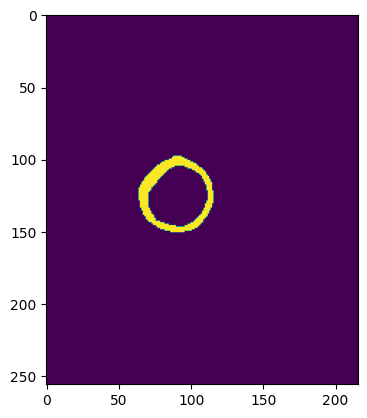

In [92]:
plt.imshow(n==3)

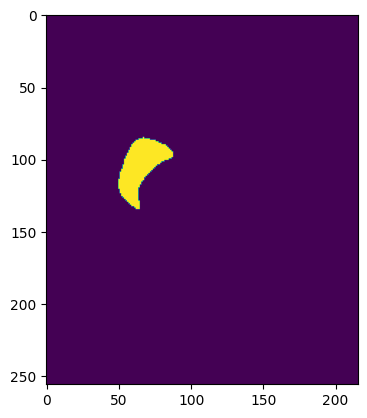

In [85]:
plt.imshow(n==3)

In [65]:
n[86, 64]

1.0

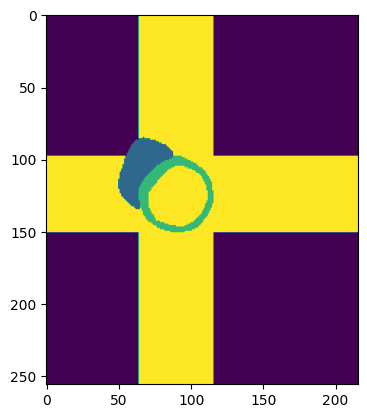

In [50]:
plt.imshow(n)

In [5]:
test_ed_seg[0].get_fdata().shape

(256, 216, 10)

In [6]:
train_ed_seg[20].shape

(240, 256, 10)

In [7]:
a = 21
#make all images have the same numbero of channel as the highest dimension (21)
for i in range(len(train_ed_seg)):
    c = train_ed_seg[i].get_fdata().shape[-1]
    if c < a:
        train_ed_seg[i] = np.pad(train_ed_seg[i].get_fdata(), ((0,0),(0,0),(0,a-c)), 'constant', constant_values=0)
        train_es_seg[i] = np.pad(train_es_seg[i].get_fdata(), ((0,0),(0,0),(0,a-c)), 'constant', constant_values=0)
        train_ed[i] = np.pad(train_ed[i].get_fdata(), ((0,0),(0,0),(0,a-c)), 'constant', constant_values=0)
        train_es[i] = np.pad(train_es[i].get_fdata(), ((0,0),(0,0),(0,a-c)), 'constant', constant_values=0)

In [8]:
for i in range (len(train_ed)):
    height, width = train_ed[i].shape[:2]

    h_32 = height - (height % 32)
    w_32 = width - (width % 32)

    pad_height = max(0, h_32 - height + 32)
    pad_width = max(0,  w_32 - width + 32)

    # Pad the image with zeros
    pad_widths = ((0, pad_height), (0, pad_width), (0, 0))
    train_ed[i]= np.pad(train_ed[i], pad_widths, mode='constant')
    train_es[i]= np.pad(train_es[i], pad_widths, mode='constant')
    train_ed_seg[i]= np.pad(train_ed_seg[i], pad_widths, mode='constant')
    train_es_seg[i]= np.pad(train_es_seg[i], pad_widths, mode='constant')


In [9]:
#put all values equal to 3 to 0
X = train_ed_seg.copy()
for i in range(len(X)):
    X[i][X[i] == 3] = 0

In [10]:
import cv2
for i in range(len(X)):
    X[i] = cv2.resize(X[i], (256, 256))
    train_ed_seg[i] = cv2.resize(train_ed_seg[i], (256, 256))

In [11]:
d = np.array([1,2,3])
e = d.copy()

In [12]:
X = np.concatenate(X, axis=0).reshape(100,256,256,21)
train_ed_seg = np.concatenate(train_ed_seg, axis=0).reshape(100,256,256,21)

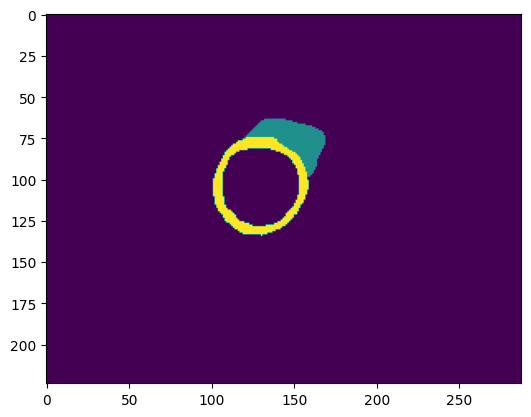

In [12]:
plt.imshow(X[0][:,:,4])

In [19]:
import keras
BACKBONE = 'resnet34'
keras.backend.set_image_data_format('channels_last')
model = sm.Unet(BACKBONE, input_shape=(None, None, 21), classes=21, activation='sigmoid', encoder_weights=None)
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score])

preprocess_input = sm.get_preprocessing(BACKBONE)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, train_ed_seg, test_size=0.2, random_state=42)

#X_train = preprocess_input(X_train)
#X_test = preprocess_input(X_test)
#y_train = preprocess_input(y_train)

#model.fit(X_train, y_train, batch_size=32, epochs=10)
model.fit(X[0].reshape(1,224, 288, 21), train_ed_seg[0].reshape(1,224, 288, 21), batch_size=32, epochs=10)
#model.fit(preprocess_input(train_ed[0][:,:,0].reshape(1, 224, 288, 1)), preprocess_input(train_ed_seg[0][:,:,0].reshape(1, 224, 288, 1)), batch_size=8, epochs=10)





Epoch 1/10
1/1 [==============================] - 10s 10s/step - loss: 1.7116 - iou_score: 0.0102
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 1.6710 - iou_score: 0.0136
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 1.6359 - iou_score: 0.0149
Epoch 4/10
1/1 [==============================] - 1s 914ms/step - loss: 1.6102 - iou_score: 0.0154
Epoch 5/10
1/1 [==============================] - 1s 958ms/step - loss: 1.5787 - iou_score: 0.0160
Epoch 6/10
1/1 [==============================] - 1s 946ms/step - loss: 1.5484 - iou_score: 0.0167
Epoch 7/10
1/1 [==============================] - 1s 955ms/step - loss: 1.5199 - iou_score: 0.0174
Epoch 8/10
1/1 [==============================] - 1s 946ms/step - loss: 1.4920 - iou_score: 0.0182
Epoch 9/10
1/1 [==============================] - 1s 898ms/step - loss: 1.4644 - iou_score: 0.0194
Epoch 10/10
1/1 [==============================] - 1s 889ms/step - loss: 1.4381 - iou_score: 0.0206


In [ ]:
import keras
BACKBONE = 'resnet34'
keras.backend.set_image_data_format('channels_last')
model = sm.Unet(BACKBONE, input_shape=(None, None, 21), classes=21, activation='sigmoid', encoder_weights=None)
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score])

preprocess_input = sm.get_preprocessing(BACKBONE)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, train_ed_seg, test_size=0.2, random_state=42)

#X_train = preprocess_input(X_train)
#X_test = preprocess_input(X_test)
#y_train = preprocess_input(y_train)

#model.fit(X_train, y_train, batch_size=32, epochs=10)
model.fit(X[0].reshape(1,224, 288, 21), train_ed_seg[0].reshape(1,224, 288, 21), batch_size=32, epochs=10)
#model.fit(preprocess_input(train_ed[0][:,:,0].reshape(1, 224, 288, 1)), preprocess_input(train_ed_seg[0][:,:,0].reshape(1, 224, 288, 1)), batch_size=8, epochs=10)





In [31]:
import keras
BACKBONE = 'resnet34'
keras.backend.set_image_data_format('channels_last')
model = sm.Unet(BACKBONE, input_shape=(None, None, 21), classes=21, activation='softmax', encoder_weights=None)
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score])

preprocess_input = sm.get_preprocessing(BACKBONE)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, train_ed_seg, test_size=0.2, random_state=42)

#X_train = preprocess_input(X_train)
#X_test = preprocess_input(X_test)
#y_train = preprocess_input(y_train)

#model.fit(X_train, y_train, batch_size=32, epochs=10)
model.fit(X, train_ed_seg, batch_size=32, epochs=10)
#model.fit(preprocess_input(train_ed[0][:,:,0].reshape(1, 224, 288, 1)), preprocess_input(train_ed_seg[0][:,:,0].reshape(1, 224, 288, 1)), batch_size=8, epochs=10)





Epoch 1/10
4/4 [==============================] - 89s 17s/step - loss: 1.6740 - iou_score: 0.0103
Epoch 2/10
4/4 [==============================] - 66s 14s/step - loss: 1.5419 - iou_score: 0.0143
Epoch 3/10
4/4 [==============================] - 53s 12s/step - loss: 1.4307 - iou_score: 0.0178
Epoch 4/10
4/4 [==============================] - 69s 17s/step - loss: 1.3398 - iou_score: 0.0190
Epoch 5/10
4/4 [==============================] - 86s 19s/step - loss: 1.2644 - iou_score: 0.0206
Epoch 6/10
4/4 [==============================] - 82s 19s/step - loss: 1.2039 - iou_score: 0.0218
Epoch 7/10
4/4 [==============================] - 86s 19s/step - loss: 1.1560 - iou_score: 0.0236
Epoch 8/10
4/4 [==============================] - 85s 19s/step - loss: 1.1190 - iou_score: 0.0256
Epoch 9/10
4/4 [==============================] - 78s 18s/step - loss: 1.0900 - iou_score: 0.0292
Epoch 10/10
4/4 [==============================] - 78s 16s/step - loss: 1.0677 - iou_score: 0.0302


In [41]:
import keras
BACKBONE = 'resnet34'
keras.backend.set_image_data_format('channels_last')
model = sm.Unet(BACKBONE, input_shape=(None, None, 1), classes=1, activation='softmax', encoder_weights=None)
model.compile(
    'Adam',
    loss=sm.losses.bce_jaccard_loss,
    metrics=[sm.metrics.iou_score])

preprocess_input = sm.get_preprocessing(BACKBONE)

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, train_ed_seg, test_size=0.2, random_state=42)

#X_train = preprocess_input(X_train)
#X_test = preprocess_input(X_test)
#y_train = preprocess_input(y_train)

#model.fit(X_train, y_train, batch_size=32, epochs=10)
model.fit(X.reshape(-1, 256, 256, 1), train_ed_seg.reshape(-1, 256, 256, 1), batch_size=32, epochs=10)
#model.fit(preprocess_input(train_ed[0][:,:,0].reshape(1, 224, 288, 1)), preprocess_input(train_ed_seg[0][:,:,0].reshape(1, 224, 288, 1)), batch_size=8, epochs=10)





Epoch 1/10
40/66 [=================>............] - ETA: 7:24 - loss: 1.1291 - iou_score: 0.0154

KeyboardInterrupt: 

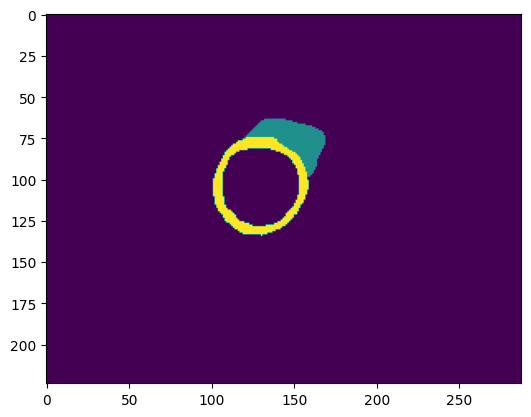

In [12]:
plt.imshow(train_ed_seg[0][:,:,4])

In [32]:
a = model.predict(train_ed_seg[0].reshape(1, 256, 256, 21))

1/1 [==============================] - 2s 2s/step


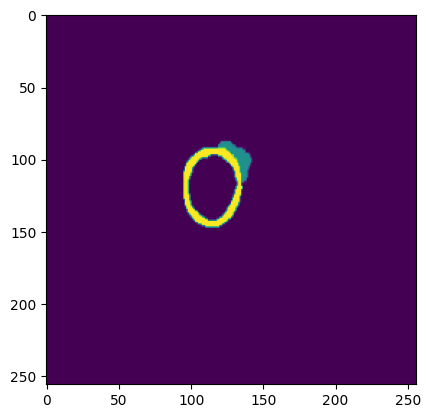

In [33]:
plt.imshow(train_ed_seg[0][:,:,7])

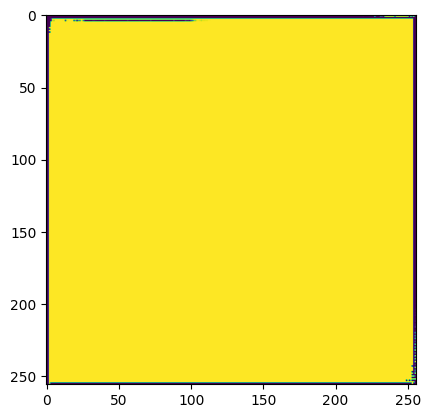

In [38]:
plt.imshow(a[0,:,:,3])

In [84]:
np.unique(a[0,:,:,0])

array([0.0000000e+00, 1.2380923e-38, 1.2519908e-38, ..., 4.5334531e-10,
       1.7944579e-09, 1.8895202e-05], dtype=float32)

In [37]:
np.unique(a[0,:,:,2])
#there are 4 unique values, i want to distribute them equally between 0 and 1
#so i will divide by 3 and then add 1/3 to each value
a[0,:,:,2] = a[0,:,:,2]/3

array([0.0000000e+00, 1.1243581e-26, 1.8162223e-06, 9.9999994e-01],
      dtype=float32)

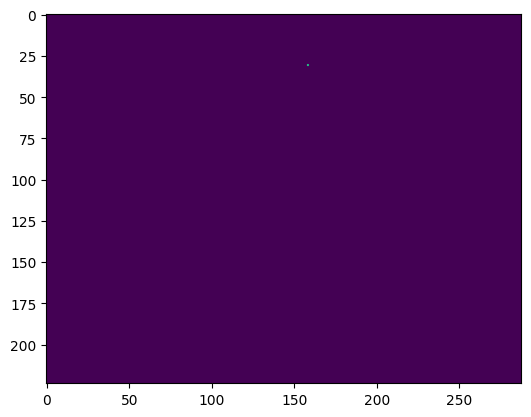

In [40]:
plt.imshow(a[0,:,:,2] ==1.1243581e-26)

In [22]:
np.unique(a)

array([0.00000000e+00, 1.18863785e-33, 5.67067401e-33, 1.08063910e-30,
       6.82984938e-30, 1.12435813e-26, 1.75879214e-25, 5.25078342e-25,
       1.92874977e-22, 1.56288208e-18, 5.89825520e-18, 7.14463238e-16,
       1.18968810e-14, 9.32392358e-12, 2.35886528e-08, 7.26581604e-08,
       3.15612567e-07, 1.81622227e-06, 5.82912653e-05, 9.99941647e-01,
       9.99998152e-01, 9.99999583e-01, 9.99999821e-01, 9.99999940e-01],
      dtype=float32)

In [76]:
train_ed_seg[0].shape

(224, 288, 21)

In [68]:
preprocess_input(train_ed_seg[0].reshape(1, 224, 288, 21)).shape

(1, 224, 288, 21)

In [54]:
preprocess_input(train_ed[0]).shape

(224, 288, 21)

In [46]:
train_ed_seg[0].shape

(224, 288, 21)

In [41]:
X_train.shape

(179, 288, 21)

In [31]:
X_train[0].shape

(224, 288, 21)

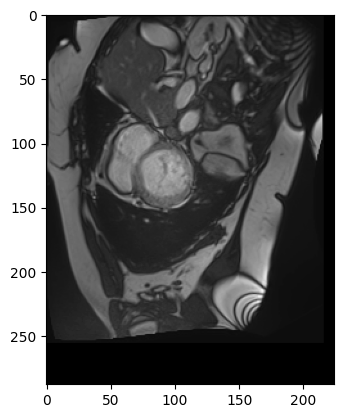

In [19]:
plt.imshow(padded_image[:,:,1], cmap='gray')

In [13]:
#find the closest multiple of 32 that is higher than the image in height and width
def closest_multiple_of_32(image):
    height, width = image.shape[:2]
    h_32 = height - (height % 32)
    w_32 = width - (width % 32)
    pad_height = max(0, h_32 - height)
    pad_width = max(0, w_32 - width)
    pad_widths = ((0, pad_height), (0, pad_width), (0, 0))
    padded_image = np.pad(image, pad_widths, mode='constant')
    return padded_image

In [15]:
height

256

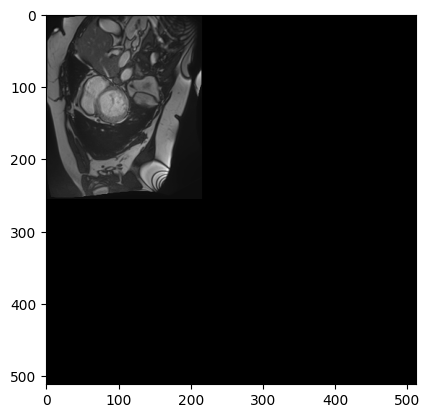

In [15]:
plt.imshow(padded_image[:,:,1], cmap='gray')

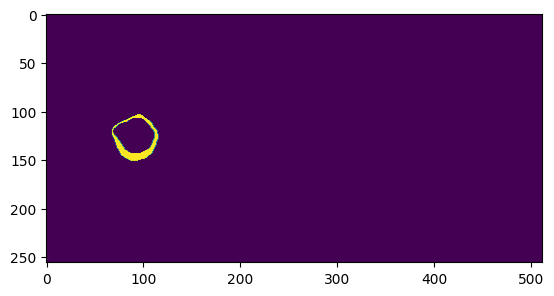

In [115]:
plt.imshow(test_ed[0][:,:,0])

In [101]:
b = []
d = 0
for i in range(len(train_ed_seg)):
    c = train_ed_seg[i].shape[1]
    if c < a:
        a = c
    b.append(c)
    if c != 256:
        d += 1
print(a)

154


In [102]:
d

35

In [100]:
np.unique(b)

array([154, 174, 176, 184, 208, 216, 224, 256, 288, 304, 384, 512])

(array([ 2.,  3.,  0., 25.,  0., 65.,  0.,  2.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([154. , 171.9, 189.8, 207.7, 225.6, 243.5, 261.4, 279.3, 297.2,
        315.1, 333. , 350.9, 368.8, 386.7, 404.6, 422.5, 440.4, 458.3,
        476.2, 494.1, 512. ]),
 <BarContainer object of 20 artists>)

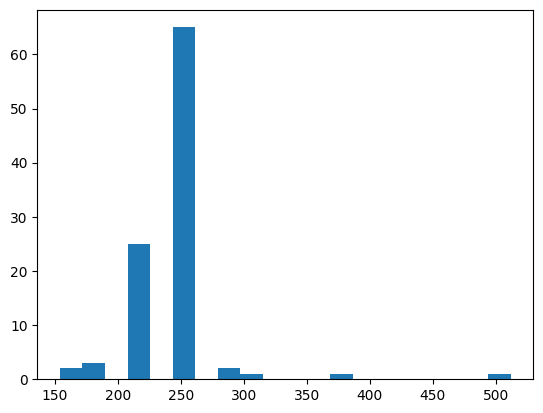

In [94]:
#plot histogram of b
plt.hist(b, bins=20)

In [84]:
height, width = test_ed_seg[0].shape[:2]

# Determine how much padding is needed to make the image 512x512
pad_height = max(0, 512 - height)
pad_width = max(0, 512 - width)

# Pad the image with zeros
pad_widths = ((0, pad_height), (0, pad_width), (0, 0))
padded_image = np.pad(test_ed_seg[0], pad_widths, mode='constant')

print(padded_image.shape)  # prints (512, 512, 21)


(512, 512, 21)


In [78]:
#make all images have shape 512 x 512 adding zeros
for i in range(len(test_ed_seg)):
    c = test_ed_seg[i].shape[1]
    if c < 512:
        test_ed_seg[i] = np.pad(test_ed_seg[i], ((0,0),(0,a-c),(0,0)), 'constant', constant_values=0)


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (3,2)  and requested shape (0,2)

In [71]:
test_ed_seg[4].shape

(168, 208, 21)

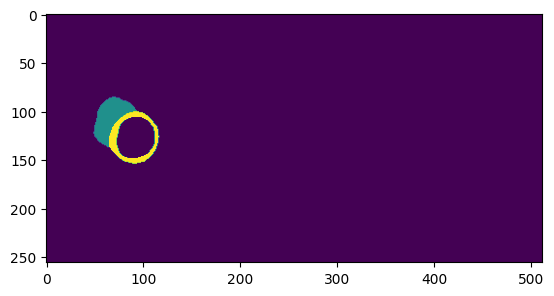

In [103]:
plt.imshow(test_ed_seg[0][:,:,2])

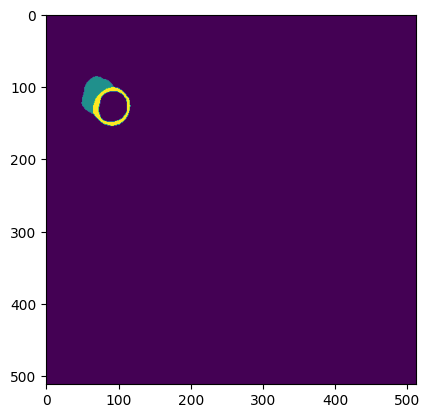

In [104]:
plt.imshow(padded_image[:,:,2])

In [11]:
len(test_ed_seg)

50